## __Importing Libraries__

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()
%matplotlib inline

In [2]:
dataset = pd.read_csv('Housing.csv')

In [3]:
dataset.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
dataset.shape

(545, 13)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
price               545 non-null int64
area                545 non-null int64
bedrooms            545 non-null int64
bathrooms           545 non-null int64
stories             545 non-null int64
mainroad            545 non-null object
guestroom           545 non-null object
basement            545 non-null object
hotwaterheating     545 non-null object
airconditioning     545 non-null object
parking             545 non-null int64
prefarea            545 non-null object
furnishingstatus    545 non-null object
dtypes: int64(6), object(7)
memory usage: 55.4+ KB


In [6]:
dataset.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [7]:
dataset['mainroad'] = dataset['mainroad'].map({'yes':1, 'no':0})
dataset['guestroom'] = dataset['guestroom'].map({'yes':1, 'no':0})
dataset['basement'] = dataset['basement'].map({'yes':1, 'no':0})
dataset['hotwaterheating'] = dataset['hotwaterheating'].map({'yes':1, 'no':0})
dataset['airconditioning'] = dataset['airconditioning'].map({'yes':1, 'no':0})
dataset['prefarea'] = dataset['prefarea'].map({'yes':1, 'no':0})

In [8]:
dataset.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [9]:
# Creating dummy variables of furnished features
status = pd.get_dummies(dataset['furnishingstatus'], drop_first=True)

In [10]:
status.head()

,semi-furnished,unfurnished
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0


In [11]:
# Adding status to dataset
dataset = pd.concat([dataset, status], axis=1)

In [12]:
dataset.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished,0,0


In [13]:
# Remove the old one
dataset.drop(['furnishingstatus'], axis=1, inplace=True)

In [14]:
dataset.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


In [15]:
# Creating new features
dataset['areaperbedroom'] = dataset['area']/dataset['bedrooms']
dataset['bbratio'] = dataset['bathrooms']/dataset['bedrooms']

In [16]:
dataset.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished,areaperbedroom,bbratio
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0,1855.0,0.500000
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0,2240.0,1.000000
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0,3320.0,0.666667
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0,1875.0,0.500000
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0,1855.0,0.250000


## _Feature Scaling_

In [17]:
def normalize(x):
    return ((x-np.min(x))/ (max(x)-min(x)))

dataset = dataset.apply(normalize)

In [18]:
# Splitting dataset to train and the test set
from sklearn.model_selection import train_test_split
X = dataset.drop('price', axis=1)
y = dataset['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## _Building Linear Model_

In [19]:
import statsmodels.api as sm
X_train = sm.add_constant(X_train)
model_1 = sm.OLS(y_train, X_train).fit()

In [20]:
print(model_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.648
Method:                 Least Squares   F-statistic:                     47.57
Date:                Thu, 14 Mar 2019   Prob (F-statistic):           2.83e-76
Time:                        12:28:20   Log-Likelihood:                 359.20
No. Observations:                 381   AIC:                            -686.4
Df Residuals:                     365   BIC:                            -623.3
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1150      0.071     

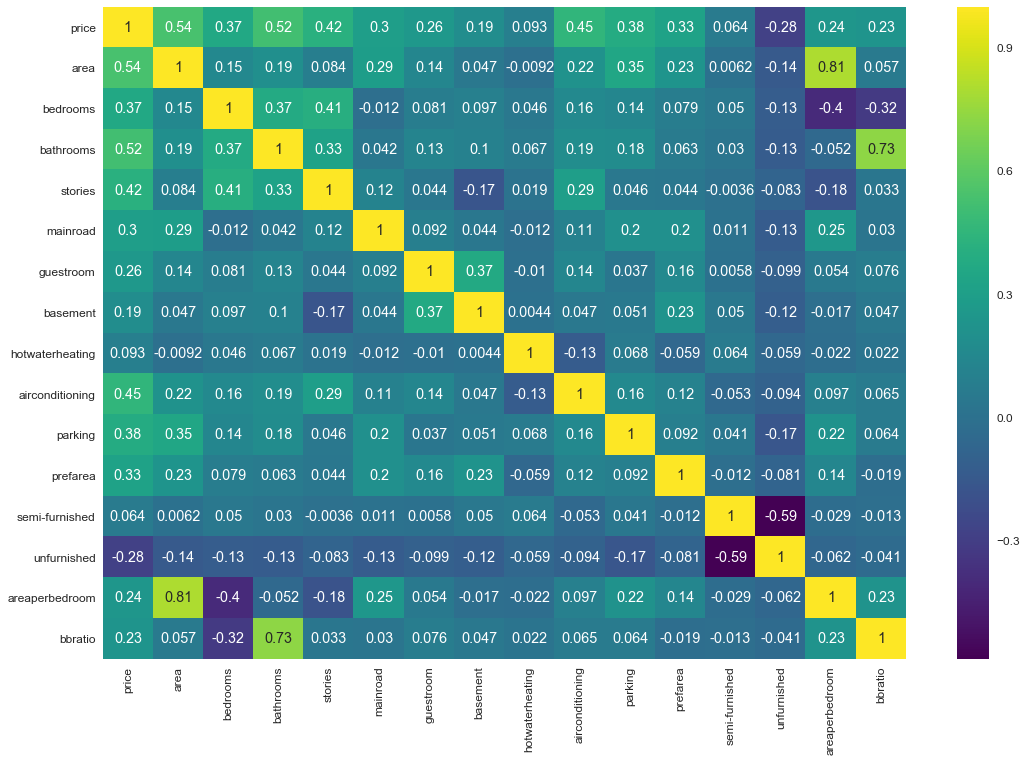

In [21]:
# Correlation Matrix
plt.figure(figsize=(18, 12))
sns.set(font_scale=1.2)
sns.heatmap(dataset.corr(), annot=True, cmap='viridis')
plt.show()

***We have Multicolinearity problem***

## _Checking for VIF_

In [22]:
def vif_cal(input_data, dependent_col):
    vif_df = pd.DataFrame(columns=['Var', 'Vif'])
    x_vars = input_data.drop([dependent_col], axis=1)
    xvar_names = x_vars.columns
    for i in range(0, xvar_names.shape[0]):
        y=x_vars[xvar_names[i]]
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.OLS(y, x).fit().rsquared
        vif=round(1/(1-rsq), 2)
        vif_df.loc[i] = [xvar_names[i], vif]
    return vif_df.sort_values(by='Vif', axis=0, ascending=False, inplace=False)

In [23]:
# Calculating the VIF values
vif_cal(input_data=dataset, dependent_col='price')

,Var,Vif
13,areaperbedroom,68.71
0,area,57.52
14,bbratio,29.25
2,bathrooms,11.11
1,bedrooms,10.68
4,mainroad,7.91
3,stories,2.81
11,semi-furnished,2.61
12,unfurnished,2.38
6,basement,2.05


In [24]:
print(model_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.648
Method:                 Least Squares   F-statistic:                     47.57
Date:                Thu, 14 Mar 2019   Prob (F-statistic):           2.83e-76
Time:                        12:28:21   Log-Likelihood:                 359.20
No. Observations:                 381   AIC:                            -686.4
Df Residuals:                     365   BIC:                            -623.3
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1150      0.071     

***Semi-furnished has high p-value but it's VIF is good,therfore we don't rush it and wait***

***bbratio has high P-Value and also high VIF value, so we immediately gonna remove it***

In [25]:
# Droping bbratio
X_train = X_train.drop('bbratio', 1)

In [26]:
# re-training the model
model_2 = sm.OLS(y_train, X_train).fit()

In [27]:
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.661
Model:                            OLS   Adj. R-squared:                  0.648
Method:                 Least Squares   F-statistic:                     50.95
Date:                Thu, 14 Mar 2019   Prob (F-statistic):           5.62e-77
Time:                        12:28:22   Log-Likelihood:                 358.81
No. Observations:                 381   AIC:                            -687.6
Df Residuals:                     366   BIC:                            -628.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0660      0.043     

In [28]:
X_train = X_train.drop('bedrooms', axis=1)

In [29]:
# Create 3th model
model_3 = sm.OLS(y_train, X_train).fit()

In [30]:
print(model_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.661
Model:                            OLS   Adj. R-squared:                  0.649
Method:                 Least Squares   F-statistic:                     54.96
Date:                Thu, 14 Mar 2019   Prob (F-statistic):           8.42e-78
Time:                        12:28:22   Log-Likelihood:                 358.67
No. Observations:                 381   AIC:                            -689.3
Df Residuals:                     367   BIC:                            -634.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0467      0.020     

In [31]:
vif_cal(input_data=dataset.drop(['bedrooms', 'bbratio'], axis=1), dependent_col='price')

,Var,Vif
0,area,14.98
12,areaperbedroom,13.88
3,mainroad,6.10
2,stories,2.56
10,semi-furnished,2.04
8,parking,2.00
5,basement,1.90
7,airconditioning,1.76
11,unfurnished,1.72
1,bathrooms,1.69


In [32]:
# Removing areperbedroom
X_train = X_train.drop('areaperbedroom', axis=1)

In [33]:
# Create 4th model
model_4 = sm.OLS(y_train, X_train).fit()

In [34]:
print(model_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.658
Model:                            OLS   Adj. R-squared:                  0.646
Method:                 Least Squares   F-statistic:                     58.87
Date:                Thu, 14 Mar 2019   Prob (F-statistic):           5.65e-78
Time:                        12:28:22   Log-Likelihood:                 356.92
No. Observations:                 381   AIC:                            -687.8
Df Residuals:                     368   BIC:                            -636.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0364      0.019     

In [35]:
vif_cal(input_data=dataset.drop(['bedrooms', 'bbratio', 'areaperbedroom'], axis=1), dependent_col='price')

,Var,Vif
3,mainroad,5.51
0,area,4.43
2,stories,2.32
10,semi-furnished,2.00
8,parking,1.99
5,basement,1.90
7,airconditioning,1.76
11,unfurnished,1.65
1,bathrooms,1.62
9,prefarea,1.50


***we can see semi-furnished not improved and still high, so we are gonna remove it***

In [36]:
X_train = X_train.drop('semi-furnished', axis=1)

In [37]:
# Creating 5th model
model_5 = sm.OLS(y_train, X_train).fit()

In [38]:
print(model_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.657
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     64.34
Date:                Thu, 14 Mar 2019   Prob (F-statistic):           7.60e-79
Time:                        12:28:22   Log-Likelihood:                 356.82
No. Observations:                 381   AIC:                            -689.6
Df Residuals:                     369   BIC:                            -642.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0318      0.017     

In [39]:
vif_cal(input_data=dataset.drop(['bedrooms', 'bbratio', 'areaperbedroom', 'semi-furnished'], axis=1),
        dependent_col='price')

,Var,Vif
3,mainroad,4.85
0,area,4.36
2,stories,2.30
8,parking,1.99
5,basement,1.86
7,airconditioning,1.75
1,bathrooms,1.62
9,prefarea,1.49
4,guestroom,1.47
10,unfurnished,1.34


In [40]:
# Removing basement
X_train = X_train.drop('basement', axis=1)

In [41]:
# Creating 6th model
model_6 = sm.OLS(y_train, X_train).fit()

In [42]:
print(model_6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                     68.85
Date:                Thu, 14 Mar 2019   Prob (F-statistic):           3.31e-78
Time:                        12:28:22   Log-Likelihood:                 353.04
No. Observations:                 381   AIC:                            -684.1
Df Residuals:                     370   BIC:                            -640.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0427      0.016     

In [43]:
vif_cal(input_data=dataset.drop(['bedrooms', 'bbratio', 'areaperbedroom', 'semi-furnished', 'basement'], axis=1),
        dependent_col='price')

,Var,Vif
3,mainroad,4.58
0,area,4.36
2,stories,2.21
7,parking,1.99
6,airconditioning,1.75
1,bathrooms,1.59
8,prefarea,1.44
9,unfurnished,1.34
4,guestroom,1.29
5,hotwaterheating,1.08


## _Making Prediction with Last Model_

In [44]:
# Adding constant variable to test dataframe
X_test_model_6 = sm.add_constant(X_test)

In [45]:
X_test_model_6 = X_test_model_6.drop(['bedrooms', 'bbratio', 'areaperbedroom', 'semi-furnished', 'basement'], axis=1)

In [46]:
# Making Predictions
pred_model_6 = model_6.predict(X_test_model_6)

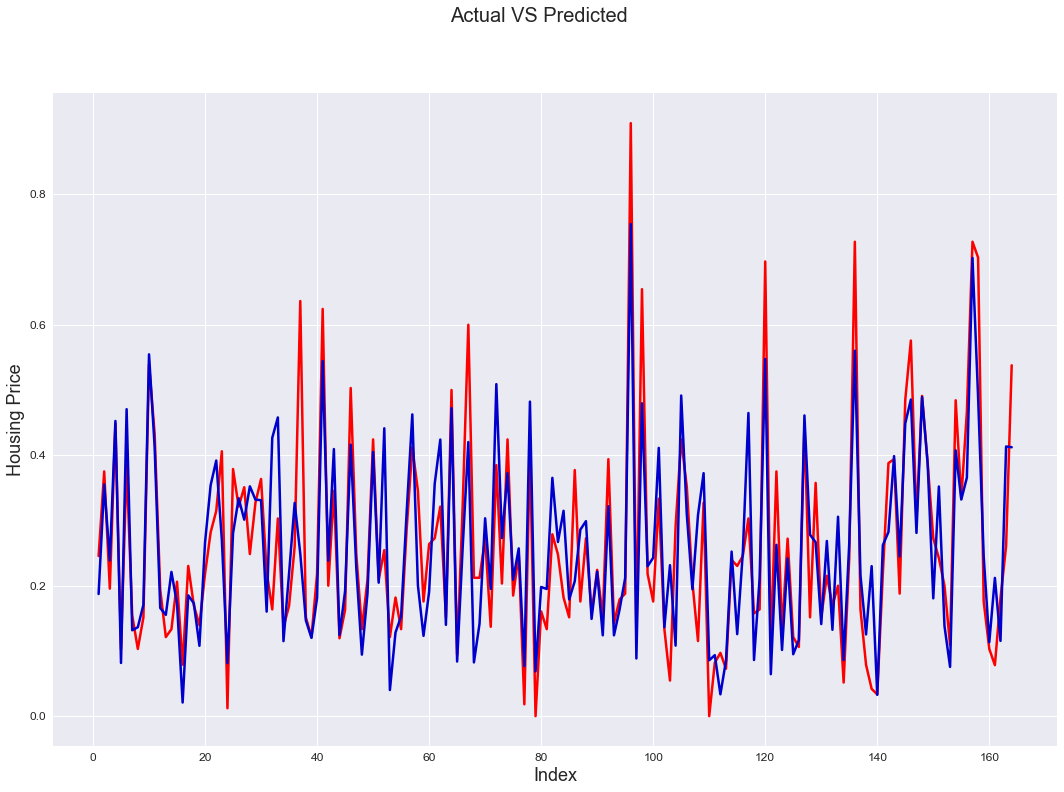

In [47]:
# Actual vs Predicted
c = [i for i in range(1, 165, 1)]
fig = plt.figure(figsize=(18, 12))
plt.plot(c, y_test, color='#FF0000', linewidth=2.5, linestyle='-')
plt.plot(c, pred_model_6, color='#0000CD', linewidth=2.5, linestyle='-')
fig.suptitle('Actual VS Predicted', fontsize=20)
plt.xlabel('Index', fontsize=18)
plt.ylabel('Housing Price', fontsize=18)
plt.show()

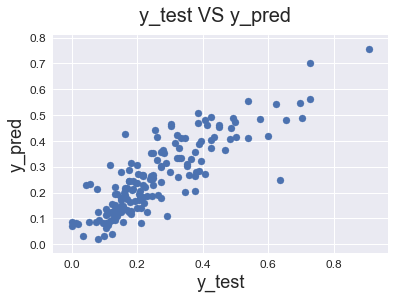

In [48]:
fig = plt.figure()
plt.scatter(y_test, pred_model_6)
fig.suptitle('y_test VS y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=18)
plt.show()

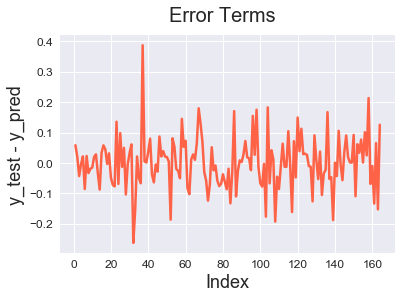

In [49]:
# Error Terms
fig = plt.figure()
c = [i for i in range(1, 165, 1)]
plt.plot(c, y_test-pred_model_6, color='#FF6347', linewidth=2.5, linestyle='-')
plt.suptitle('Error Terms', fontsize=20)
plt.xlabel('Index', fontsize=18)
plt.ylabel('y_test - y_pred', fontsize=18)
plt.show()

/home/sparda/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


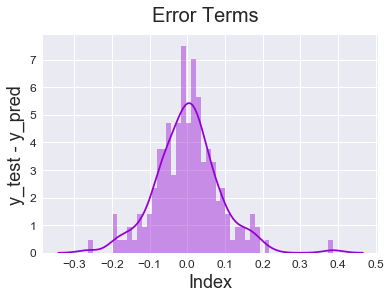

In [54]:
# Plotting the Distribution of errors
fig = plt.figure()
sns.distplot(y_test-pred_model_6, bins=50, color='#9400D3')
plt.suptitle('Error Terms', fontsize=20)
plt.xlabel('Index', fontsize=18)
plt.ylabel('y_test - y_pred', fontsize=18)
plt.show()

In [55]:
from sklearn.metrics import mean_squared_error
print('RMSE: ', np.sqrt(mean_squared_error(y_test, pred_model_6)))

RMSE:  0.08592746291578796


# FIN